# Uber Supply-Demand Gap

* ### Rahul Kumar  || 9538109454  ||  Rahul.cs068@gmail.com 

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# 1. Import the required libraries for the analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load the Uber data
#### This data is considers only the trips to and from the airport

In [3]:
uberdata = pd.read_csv("./Uber Request Data.csv")
uberdata

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


# 3. Data Cleaning & Preparation

## 3.1 Data inspection

#### Check Shape of Data frame

In [4]:
uberdata.shape

(6745, 6)

#### Check details for each column

In [5]:
uberdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


#### Check for NULL values

In [6]:
uberdata.isnull().sum(axis=0)

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

We have about <b>6564</b> NA values, which are distributed between Driver id (2650) and Drop timestamp(3914)

## 3.2 Data Cleaning

### 3.2.1 Verify NaN values and Impute, if required

<b>'Driver id'</b> and <b>'Drop Timestamp'</b> field has many NaN values


Driver IDs are NULL only when trip is not completed means no cars available, so these NULLs can be considered as valid,hence necessarily not required to filter out or impute with some other values

Similarly for 'Drop Timestamp' , not necessarily required to impute any value

In [7]:
uberdata.isnull().sum(axis=0)

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

### 3.2.2 Change of Datetime fields into proper data type & format

In above data we could see two fields <b>'Request timestamp'</b> and <b>'Drop timestamp'</b> are not having proper values. The data time values stored in difefrent formats. Lets convert this in one format

In [8]:
uberdata['Request timestamp'] = pd.to_datetime(uberdata['Request timestamp'].str.replace('/','-'), dayfirst=True)
uberdata['Drop timestamp'] = pd.to_datetime(uberdata['Drop timestamp'].str.replace('/','-'), dayfirst=True)

uberdata

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


## 3.3 Data Preparation

### 3.3.1 Derive new variables which will be useful for analysis

* tripDuration  -- difference between drop and request time
* reqYear       -- extract Year from Request timestamp
* reqMonth      -- extract Month from Request timestamp
* reqDay        -- extract Day from Request timestamp
* reqHour       -- extract Hour from Request timestamp
* reqMinute     -- extract Minute from Request timestamp

In [9]:
uberdata['tripDuration'] = uberdata['Drop timestamp'] - uberdata['Request timestamp']
uberdata['reqYear'] = uberdata['Request timestamp'].dt.year
uberdata['reqMonth'] = uberdata['Request timestamp'].dt.month
uberdata['reqDay'] = uberdata['Request timestamp'].dt.day
uberdata['reqHour'] = uberdata['Request timestamp'].dt.hour
uberdata['reqMinute'] = uberdata['Request timestamp'].dt.minute

uberdata['drpYear'] = uberdata['Drop timestamp'].dt.year
uberdata['drpMonth'] = uberdata['Drop timestamp'].dt.month
uberdata['drpDay'] = uberdata['Drop timestamp'].dt.day
uberdata['drpHour'] = uberdata['Drop timestamp'].dt.hour
uberdata['drpMinute'] = uberdata['Drop timestamp'].dt.minute

uberdata

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,tripDuration,reqYear,reqMonth,reqDay,reqHour,reqMinute,drpYear,drpMonth,drpDay,drpHour,drpMinute
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,01:09:00,2016,7,11,11,51,2016.0,7.0,11.0,13.0,0.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,00:50:00,2016,7,11,17,57,2016.0,7.0,11.0,18.0,47.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,00:41:00,2016,7,12,9,17,2016.0,7.0,12.0,9.0,58.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,00:55:00,2016,7,12,21,8,2016.0,7.0,12.0,22.0,3.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31,2016,7,13,8,33,2016.0,7.0,13.0,9.0,25.0
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,00:31:31,2016,7,13,21,57,2016.0,7.0,13.0,22.0,28.0
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,00:57:43,2016,7,14,6,15,2016.0,7.0,14.0,7.0,13.0
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,00:56:00,2016,7,15,5,11,2016.0,7.0,15.0,6.0,7.0
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,00:53:24,2016,7,15,17,57,2016.0,7.0,15.0,18.0,50.0
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,00:39:00,2016,7,11,6,46,2016.0,7.0,11.0,7.0,25.0


# 4. Data Analysis

#### verify uniqueness of records

In [10]:
uberdata['Request id'].count()

6745

In [11]:
uberdata['Request id'].nunique()

6745

In [12]:
uberdata['Pickup point'].unique().tolist()

['Airport', 'City']

In [13]:
uberdata['Status'].unique().tolist()

['Trip Completed', 'Cancelled', 'No Cars Available']

In [14]:
print(uberdata.groupby('Pickup point')['Request id'].count())

Pickup point
Airport    3238
City       3507
Name: Request id, dtype: int64


In [15]:
print(uberdata.groupby('Status')['Request id'].count())

Status
Cancelled            1264
No Cars Available    2650
Trip Completed       2831
Name: Request id, dtype: int64


In [16]:
print(uberdata.groupby('reqHour')['Request id'].count())

reqHour
0      99
1      85
2      99
3      92
4     203
5     445
6     398
7     406
8     423
9     431
10    243
11    171
12    184
13    160
14    136
15    171
16    159
17    418
18    510
19    473
20    492
21    449
22    304
23    194
Name: Request id, dtype: int64


# 5. Problem Investigation

## 5.1 Visually identify the most pressing problems for Uber

### 5.1.1 Lets find the frequency of trip cancellation and no availability of cars from 'City to Airport' and 'Airport to City'

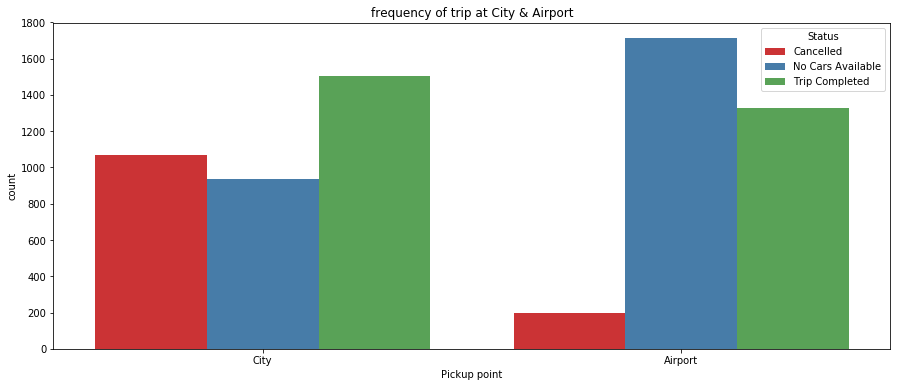

In [17]:
plt.subplots(figsize=(15, 6))
sns.countplot(x="Pickup point", hue = "Status", data=uberdata.sort_values('Status', ascending=True), palette="Set1")
plt.title('frequency of trip at City & Airport')
plt.show()

looking to this above plot, the problem seems like  

from <b>Airport to City</b>, most likely chances of car un-availability

from <b>City to Airport</b>, cancellation is higher and also Car availibility is challenging too

... lets see more detail to identify the exact problem area

### plots to visualise the overall frequency of requests that get completed or cancelled

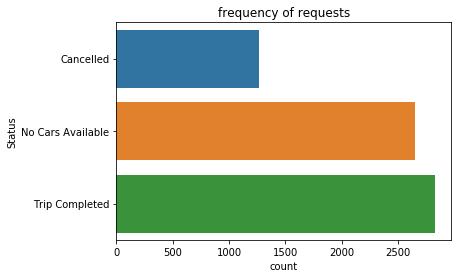

In [18]:
sns.countplot(y="Status", data=uberdata.sort_values('Status', ascending=True))
plt.title('frequency of requests')
plt.show()

### plots to visualise the frequency of requests that get cancelled or show 'no cars available'

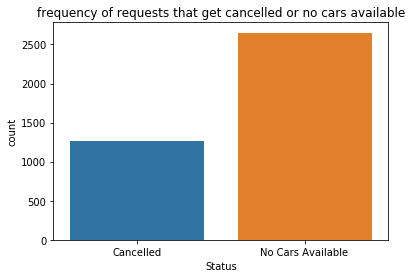

In [19]:
sns.countplot(x="Status", data=uberdata[uberdata['Status'] != 'Trip Completed'])
plt.title('frequency of requests that get cancelled or no cars available')
plt.show()

### 5.1.2 Identify the most problematic types of requests
* #### City to Airport 
* #### Airport to City

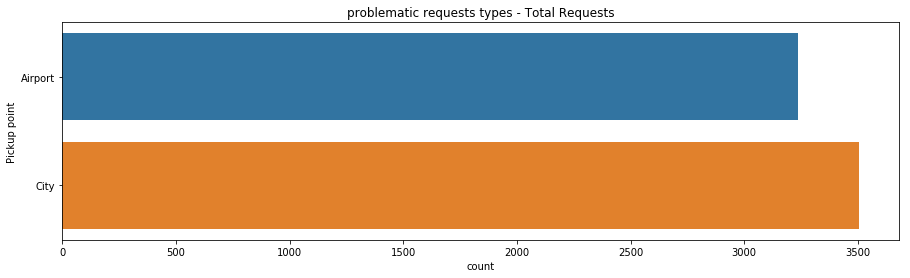

In [20]:
plt.subplots(figsize=(15, 4))
sns.countplot(y="Pickup point", data=uberdata.sort_values('Pickup point'))
plt.title('problematic requests types - Total Requests')
plt.show()

#### for Cancelled and no car availbility

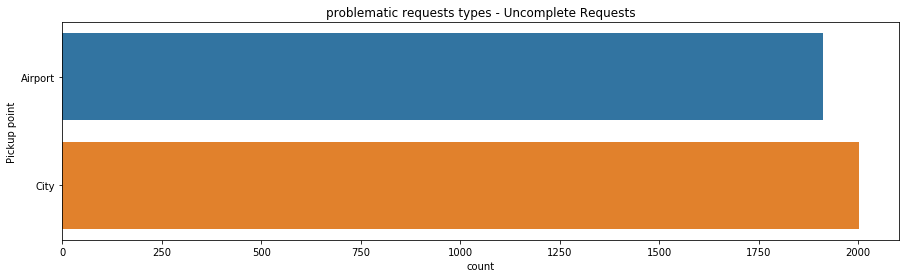

In [21]:
plt.subplots(figsize=(15, 4))
sns.countplot(y="Pickup point", data=uberdata[uberdata['Status'] != 'Trip Completed'].sort_values('Pickup point'))
plt.title('problematic requests types - Uncomplete Requests')
plt.show()

looking to above both plots, this gives us observation that comparetively more request of cars are from <b>City to Airport</b> and that is problematic too, because most cancellation or un-availability of car is happening at <b>City to Airport</b>


### 5.1.3 time slots (early mornings, late evenings etc.) using plots

#### Now lets see hourly ditribution of trips based on pickup point

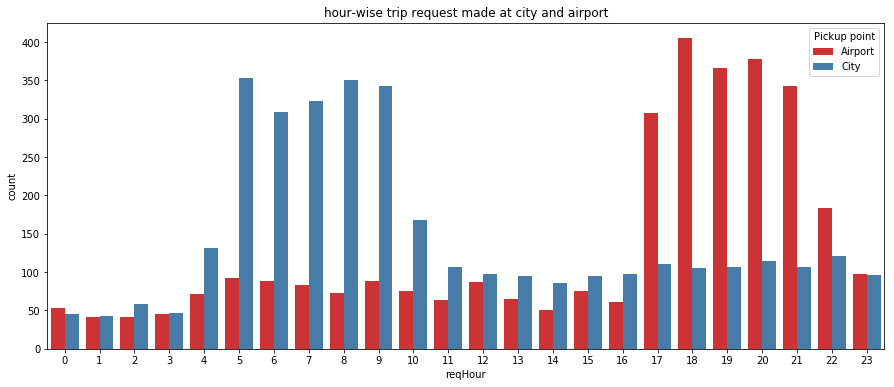

In [22]:
# hour-wise trip request made at city and airport respectively. 
# Each bar corresponds to an hour and pick-up point (city / airport)

plt.subplots(figsize=(15, 6))
sns.countplot(x="reqHour", hue = "Pickup point", data=uberdata, palette="Set1")
plt.title('hour-wise trip request made at city and airport')
plt.show()

#### In the bar chart (above), we can see the bars are high at some specific time range. let split the 24 hours into different time slots to identify the problem precisely 

#### We may divide the request-time into 5 time-slots as below.

* Pre_Morning
* Morning_Rush
* Day_Time
* Evening_Rush
* Late_Night

#### first create a DF with different tiemslots

In [23]:
data = [[1, '0-4', 'Early_Morning'],[2, '5-9', 'Morning_Rush', ],[3, '10-16', 'Day_Time'], [4, '17-21', 'Evening_Rush'], [5, '22-23', 'Late_Night']]
timeslots = pd.DataFrame(data,columns=['SlotID','Slots','DayStage'])
timeslots

,SlotID,Slots,DayStage
0,1,0-4,Early_Morning
1,2,5-9,Morning_Rush
2,3,10-16,Day_Time
3,4,17-21,Evening_Rush
4,5,22-23,Late_Night


#### now we will create a condition statement to group the time slots and store in new column 'time_slot'

In [24]:
# Method 1
#uberdata['time_slot'] = 'NA'
#uberdata['time_slot'][(uberdata['reHour'] >= 0) & (uberdata['reHour'] <= 4)] = 'Early_Morning'
#uberdata['time_slot'][(uberdata['reHour'] >= 5) & (uberdata['reHour'] <= 9)] = 'Morning_Rush'
#uberdata['time_slot'][(uberdata['reHour'] >= 10) & (uberdata['reHour'] <= 16)] = 'Day_Time'
#uberdata['time_slot'][(uberdata['reHour'] >= 17) & (uberdata['reHour'] <= 21)] = 'Evening_Rush'
#uberdata['time_slot'][(uberdata['reHour'] >= 22) & (uberdata['reHour'] <= 23)] = 'Late_Night'


# Method 2
slotname=['Early_Morning','Morning_Rush','Day_Time','Evening_Rush','Late_Night']

uberdata['time_slot'] = uberdata['reqHour'].apply(lambda x : slotname[0] if x <= 4 else
                                                             (slotname[1] if x >=5 and x <=9 else
                                                                (slotname[2] if x>=10 and x <=16 else
                                                                 (slotname[3] if x>=17 and x <=21 else
                                                                  (slotname[4] if x>=22 and x <=23 else x)
                                                                  )
                                                                )
                                                              )
                                                    )



uberdata

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,tripDuration,reqYear,reqMonth,reqDay,reqHour,reqMinute,drpYear,drpMonth,drpDay,drpHour,drpMinute,time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,01:09:00,2016,7,11,11,51,2016.0,7.0,11.0,13.0,0.0,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,00:50:00,2016,7,11,17,57,2016.0,7.0,11.0,18.0,47.0,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,00:41:00,2016,7,12,9,17,2016.0,7.0,12.0,9.0,58.0,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,00:55:00,2016,7,12,21,8,2016.0,7.0,12.0,22.0,3.0,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31,2016,7,13,8,33,2016.0,7.0,13.0,9.0,25.0,Morning_Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,00:31:31,2016,7,13,21,57,2016.0,7.0,13.0,22.0,28.0,Evening_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,00:57:43,2016,7,14,6,15,2016.0,7.0,14.0,7.0,13.0,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,00:56:00,2016,7,15,5,11,2016.0,7.0,15.0,6.0,7.0,Morning_Rush
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,00:53:24,2016,7,15,17,57,2016.0,7.0,15.0,18.0,50.0,Evening_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,00:39:00,2016,7,11,6,46,2016.0,7.0,11.0,7.0,25.0,Morning_Rush


### to know the number of trips made will create a df where status is trip completed

In [25]:
uberdata_tripComp = uberdata[uberdata['Status'] == 'Trip Completed']
uberdata_tripComp

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,tripDuration,reqYear,reqMonth,reqDay,reqHour,reqMinute,drpYear,drpMonth,drpDay,drpHour,drpMinute,time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,01:09:00,2016,7,11,11,51,2016.0,7.0,11.0,13.0,0.0,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,00:50:00,2016,7,11,17,57,2016.0,7.0,11.0,18.0,47.0,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,00:41:00,2016,7,12,9,17,2016.0,7.0,12.0,9.0,58.0,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,00:55:00,2016,7,12,21,8,2016.0,7.0,12.0,22.0,3.0,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31,2016,7,13,8,33,2016.0,7.0,13.0,9.0,25.0,Morning_Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,00:31:31,2016,7,13,21,57,2016.0,7.0,13.0,22.0,28.0,Evening_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,00:57:43,2016,7,14,6,15,2016.0,7.0,14.0,7.0,13.0,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,00:56:00,2016,7,15,5,11,2016.0,7.0,15.0,6.0,7.0,Morning_Rush
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,00:53:24,2016,7,15,17,57,2016.0,7.0,15.0,18.0,50.0,Evening_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,00:39:00,2016,7,11,6,46,2016.0,7.0,11.0,7.0,25.0,Morning_Rush


### plot a bar chart for number of trips made during different time slots

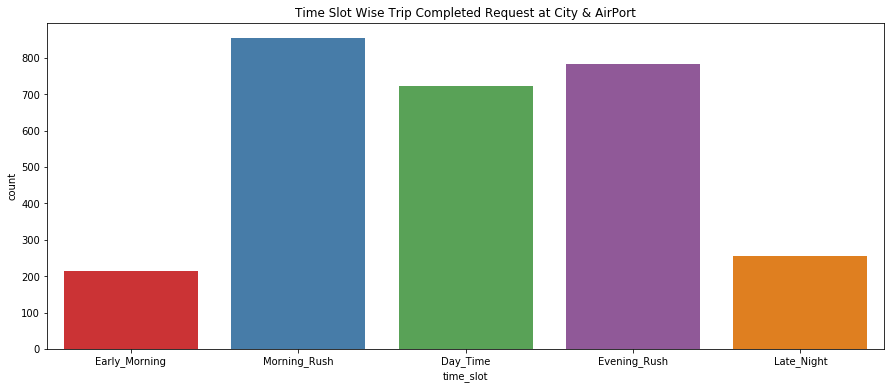

In [26]:
# sort the dataset 'uberdata_tripComp' on time_slot, so to visualization of data would be in proper ordered manner
uberdata_tripComp = uberdata_tripComp.sort_values('reqHour', ascending=True)

plt.subplots(figsize=(15, 6))
sns.countplot(x="time_slot", data=uberdata_tripComp, palette="Set1")
plt.title('Time Slot Wise Trip Completed Request at City & AirPort')
plt.show()

### number of trips made during different time slots from City to Airport and vice versa

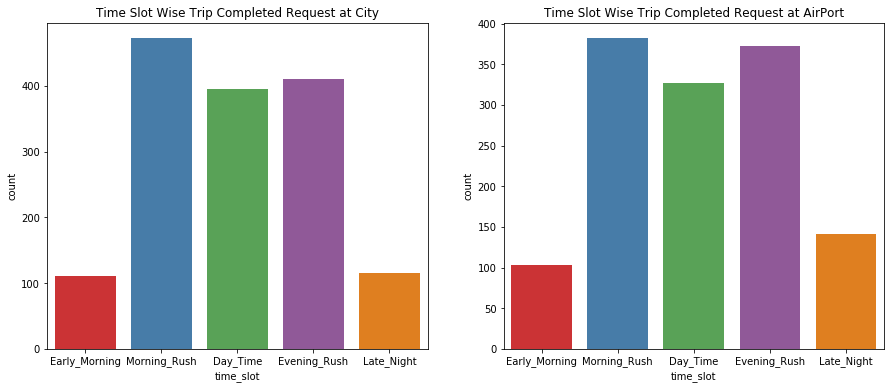

In [27]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x="time_slot", data=uberdata_tripComp[uberdata_tripComp['Pickup point'] == 'City'], palette="Set1")
plt.title('Time Slot Wise Trip Completed Request at City')
#plt.show()

plt.subplot(1,2,2)
sns.countplot(x="time_slot", data=uberdata_tripComp[uberdata_tripComp['Pickup point'] == 'Airport'], palette="Set1")
plt.title('Time Slot Wise Trip Completed Request at AirPort')
plt.show()

### No of Request Made at Different Time Slots and Their Status

#### Now we will make a stacked bar chart where each bar rep a time slot
* #### and Y axis rep frequency of request and different proportion will
* #### represent different status

## 5.2 Find out the gap between supply and demand and show the same using plots

### 5.2.1 Find the time slots when the highest gap exists

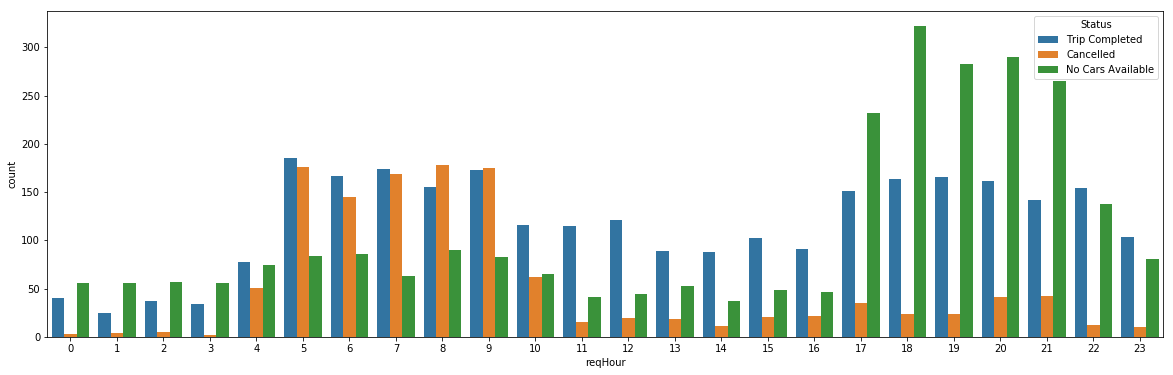

In [28]:
plt.subplots(figsize=(20, 6))
sns.countplot(x="reqHour", hue = "Status", data=uberdata)
plt.show()

#### this looks that from hour 5-9 and 17-21, there is more deviation between supply and demand

#### let see the same data on time_slot

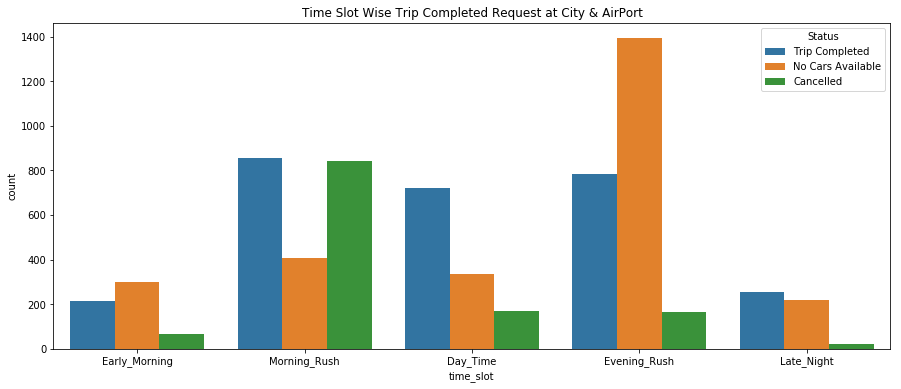

In [29]:
plt.subplots(figsize=(15, 6))
sns.countplot(x="time_slot", hue = "Status", data=uberdata.sort_values('reqHour'))
plt.title('Time Slot Wise Trip Completed Request at City & AirPort')
plt.show()

now it is very much clear, the gap between supply and demand lies in hours of <b>'Morning_Rush'</b> and <b>'Evening_Rush'</b>

#### by visual inspection we see that there is huge demand in morning and evening rush but very few trip are completed

#### In morning hours, Cancellation is very high, where in Eevning_rush time slot, no availability of cars



### 5.2.2 Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

#### we have already idenify the time slot where problem is
i.e.
* #### 'Morning_Rush'
* #### 'Evening_Rush'



#### lets find out the supply demand gap ratio/percentage in problematic both time_slots

In [30]:
uberdata['time_slot'].value_counts()

Evening_Rush     2342
Morning_Rush     2103
Day_Time         1224
Early_Morning     578
Late_Night        498
Name: time_slot, dtype: int64

In [31]:
x = uberdata['Status'].count()           # total request made
y = uberdata_tripComp['Status'].count()  # total trip completed

round((y/x)*100, 2)

41.97

##### this means overall whatever the request made as whole, only ~42% request is served, remaining times either cancelled or car not available

#### at Morning_Rush, find the gap

In [32]:
MR_TripTot = len(uberdata[uberdata.time_slot == "Morning_Rush"])
MR_TripTot

2103

In [33]:
MR_TripComp = len(uberdata.loc[(uberdata['time_slot'] == "Morning_Rush") & (uberdata['Status'] == 'Trip Completed')])
MR_TripComp

854

In [34]:
MR_TripTol_TripComp_Per = round(( MR_TripComp / MR_TripTot ) * 100, 2)
MR_TripTol_TripComp_Per

40.61

#### at Evening_Rush, find the gap

In [35]:
ER_TripTot = len(uberdata[uberdata.time_slot == "Evening_Rush"])
ER_TripTot

2342

In [36]:
ER_TripComp = len(uberdata.loc[(uberdata['time_slot'] == "Evening_Rush") & (uberdata['Status'] == 'Trip Completed')])
ER_TripComp

784

In [37]:
ER_TripTol_TripComp_Per = round(( ER_TripComp / ER_TripTot ) * 100, 2)
ER_TripTol_TripComp_Per

33.48

looking to these two values from morning and evening rush, its clear that less trip completion has happened in evening hours, hence this is something problematic area

### supply demand gap ratio/percentage at Airport and City by bith time_slots

#### lets find out the supply demand gap ratio/percentage for --

#### a. Morning Rush at Airport

In [38]:
uberdata_morningrush = uberdata[uberdata['time_slot']=='Morning_Rush']
#uberdata_morningrush

In [39]:
Air_MR_TripTot = len(uberdata_morningrush[uberdata_morningrush['Pickup point'] == "Airport"])
Air_MR_TripTot

426

In [40]:
Air_MR_TripCanc = len(uberdata_morningrush.loc[(uberdata_morningrush['Pickup point'] == "Airport") & (uberdata_morningrush['Status'] != 'Trip Completed')])
Air_MR_TripCanc

44

In [41]:
Air_MR_TripTol_TripCanc_Per = round(( Air_MR_TripCanc / Air_MR_TripTot ) * 100, 2)
Air_MR_TripTol_TripCanc_Per

10.33

#### b. Morning Rush at City

In [42]:
City_MR_TripTot = len(uberdata_morningrush[uberdata_morningrush['Pickup point'] == "City"])
City_MR_TripTot

1677

In [43]:
City_MR_TripCanc = len(uberdata_morningrush.loc[(uberdata_morningrush['Pickup point'] == "City") & (uberdata_morningrush['Status'] != 'Trip Completed')])
City_MR_TripCanc

1205

In [44]:
City_MR_TripTol_TripCanc_Per = round(( City_MR_TripCanc / City_MR_TripTot ) * 100, 2)
City_MR_TripTol_TripCanc_Per

71.85

#### For morning_rush, travelling from City to Airport is likely more problematic

#### c. Evening Rush at Airport

In [45]:
uberdata_eveningrush = uberdata[uberdata['time_slot']=='Evening_Rush']
#uberdata_eveningrush

In [46]:
Air_ER_TripTot = len(uberdata_eveningrush[uberdata_eveningrush['Pickup point'] == "Airport"])
Air_ER_TripTot

1800

In [47]:
Air_ER_TripCanc = len(uberdata_eveningrush.loc[(uberdata_eveningrush['Pickup point'] == "Airport") & (uberdata_eveningrush['Status'] != 'Trip Completed')])
Air_ER_TripCanc

1427

In [48]:
Air_ER_TripTol_TripCanc_Per = round(( Air_ER_TripCanc / Air_ER_TripTot ) * 100, 2)
Air_ER_TripTol_TripCanc_Per

79.28

#### d. Evening Rush at City

In [49]:
City_ER_TripTot = len(uberdata_eveningrush[uberdata_eveningrush['Pickup point'] == "City"])
City_ER_TripTot

542

In [50]:
City_ER_TripCanc = len(uberdata_eveningrush.loc[(uberdata_eveningrush['Pickup point'] == "City") & (uberdata_eveningrush['Status'] != 'Trip Completed')])
City_ER_TripCanc

131

In [51]:
City_ER_TripTol_TripCanc_Per = round(( City_ER_TripCanc / City_ER_TripTot ) * 100, 2)
City_ER_TripTol_TripCanc_Per

24.17

#### For evening_rush, travelling from Airport to City more problematic

##### ----------------- No Cars Avilable

#### a. Morning Rush at Airport

In [52]:
Air_MR_TripTot = len(uberdata_morningrush[uberdata_morningrush['Pickup point'] == "Airport"])
Air_MR_TripTot

426

In [53]:
Air_MR_TripNC = len(uberdata_morningrush.loc[(uberdata_morningrush['Pickup point'] == "Airport") & (uberdata_morningrush['Status'] == 'No Cars Available')])
Air_MR_TripNC

21

In [54]:
Air_MR_TripTol_TripCanc_Per = round(( Air_MR_TripNC / Air_MR_TripTot ) * 100, 2)
Air_MR_TripTol_TripCanc_Per

4.93

#### b. Morning Rush at City

In [55]:
City_MR_TripTot = len(uberdata_morningrush[uberdata_morningrush['Pickup point'] == "City"])
City_MR_TripTot

1677

In [56]:
City_MR_TripNC = len(uberdata_morningrush.loc[(uberdata_morningrush['Pickup point'] == "City") & (uberdata_morningrush['Status'] == 'No Cars Available')])
City_MR_TripNC

385

In [57]:
City_MR_TripTol_TripCanc_Per = round(( City_MR_TripNC / City_MR_TripTot ) * 100, 2)
City_MR_TripTol_TripCanc_Per

22.96

#### c. Evening Rush at Airport

In [58]:
Air_ER_TripTot = len(uberdata_eveningrush[uberdata_eveningrush['Pickup point'] == "Airport"])
Air_ER_TripTot

1800

In [59]:
Air_ER_TripNC = len(uberdata_eveningrush.loc[(uberdata_eveningrush['Pickup point'] == "Airport") & (uberdata_eveningrush['Status'] == 'No Cars Available')])
Air_ER_TripNC

1321

In [60]:
Air_ER_TripTol_TripCanc_Per = round(( Air_ER_TripNC / Air_ER_TripTot ) * 100, 2)
Air_ER_TripTol_TripCanc_Per

73.39

#### d. Evening Rush at City

In [61]:
City_ER_TripTot = len(uberdata_eveningrush[uberdata_eveningrush['Pickup point'] == "City"])
City_ER_TripTot

542

In [62]:
City_ER_TripNC = len(uberdata_eveningrush.loc[(uberdata_eveningrush['Pickup point'] == "City") & (uberdata_eveningrush['Status'] == 'No Cars Available')])
City_ER_TripNC

71

In [63]:
City_ER_TripTol_TripCanc_Per = round(( City_ER_TripNC / City_ER_TripTot ) * 100, 2)
City_ER_TripTol_TripCanc_Per

13.1

#### Result --> 
In Morning_Rush, there is no problem of car availability from Airport to City, but slightly issue from City to Airport
For evening_rush, we could see there is <b>much scarcity of cars at Airport </b>, the percentage of 'No Car Availability' is very high.

##### ----------------- Trip Cancelled

#### a. Morning Rush at Airport

In [64]:
Air_MR_TripTot = len(uberdata_morningrush[uberdata_morningrush['Pickup point'] == "Airport"])
Air_MR_TripTot

426

In [65]:
Air_MR_TripTC = len(uberdata_morningrush.loc[(uberdata_morningrush['Pickup point'] == "Airport") & (uberdata_morningrush['Status'] == 'Cancelled')])
Air_MR_TripTC

23

In [66]:
Air_MR_TripTol_TripCanc_Per = round(( Air_MR_TripTC / Air_MR_TripTot ) * 100, 2)
Air_MR_TripTol_TripCanc_Per

5.4

#### b. Morning Rush at City

In [67]:
City_MR_TripTot = len(uberdata_morningrush[uberdata_morningrush['Pickup point'] == "City"])
City_MR_TripTot

1677

In [68]:
City_MR_TripTC = len(uberdata_morningrush.loc[(uberdata_morningrush['Pickup point'] == "City") & (uberdata_morningrush['Status'] == 'Cancelled')])
City_MR_TripTC

820

In [69]:
City_MR_TripTol_TripCanc_Per = round(( City_MR_TripTC / City_MR_TripTot ) * 100, 2)
City_MR_TripTol_TripCanc_Per

48.9

#### c. Evening Rush at Airport

In [70]:
Air_ER_TripTot = len(uberdata_eveningrush[uberdata_eveningrush['Pickup point'] == "Airport"])
Air_ER_TripTot

1800

In [71]:
Air_ER_TripTC = len(uberdata_eveningrush.loc[(uberdata_eveningrush['Pickup point'] == "Airport") & (uberdata_eveningrush['Status'] == 'Cancelled')])
Air_ER_TripTC

106

In [72]:
Air_ER_TripTol_TripCanc_Per = round(( Air_ER_TripTC / Air_ER_TripTot ) * 100, 2)
Air_ER_TripTol_TripCanc_Per

5.89

#### d. Evening Rush at City

In [73]:
City_ER_TripTot = len(uberdata_eveningrush[uberdata_eveningrush['Pickup point'] == "City"])
City_ER_TripTot

542

In [74]:
City_ER_TripTC = len(uberdata_eveningrush.loc[(uberdata_eveningrush['Pickup point'] == "City") & (uberdata_eveningrush['Status'] == 'Cancelled')])
City_ER_TripTC

60

In [75]:
City_ER_TripTol_TripCanc_Per = round(( City_ER_TripTC / City_ER_TripTot ) * 100, 2)
City_ER_TripTol_TripCanc_Per

11.07

#### Result --> 
In Morning_Rush, from City to Airport, there is more number of cancellation


Till now we figured out, problematic time slot, location (Airport or City) and type like 'Cancellation' or 'No Car Availability'

Now, lets check why cancellations are happening

After manually scanning through the data set is seems that that waiting time
for drivers in the morning is high. 

For analysis, we could follow this method:
* 1) Take the data from uberdata dataframe with status "Trip Completed or Cancelled", and sort by Driver Id & Request time
* 2) Iterate over different Driver Ids
* 3) For each driver Id take up all the rows
* 4) Iterate over all the rows, and see if
    *    4.a) current trip Pickup point == City && Next Trip Pickup point == "Airport"
    *    4.b) current trip Status == "Trip Completed"
    *    4.c) current trip Request date == next trip Request date are same
* 5) If above are yes, then this a potential candidate for WaitingTime calculation
* 6) Build a new data frame say 'uberdata_Canc' with selected details


#### The waiting time is very high during "EarlyMorning" & "MorningRush" hours, and hence this could be a probable reason for drivers cancelling the request from the city, during these

### ----------------------------- FINAL ISSUE INDENTIFIED ---------------------------------#

#### 1. The main issue with trip where pickup.point is Airport is evening rush hours where organic supply is missing. This has been proved from demand/supply comparison graph over all dates
#### 2. The main issue with trip where pickup.point is City is cancellation in the morning hours. One of the issue is demand supply gap and also the waiting time at the airport.


##### ---------------------------------------------------------------------------<b> End of File </b>-----------------------------------------------------------------------------